# Hands on Regression - First Contact

This notebook is intended to introduce the problem of regression. It includes familiarization with a linear and polynomial regression model, as well as evaluation techniques and metrics.

https://docs.google.com/presentation/d/1VCNsLJbL_c8IM30P4sj0hayBbk_j8_OVlyoMnHtIX54/edit?usp=sharing

## Part 1 - Load and Visualize dummy data

In this first part, the goal is to generate data that is friendly to visualize and understand. For this purpose, the ```make_regression``` function is used, in order to generate instances (independent variables) associated with a dependent variable (what is intended to be predicted). Additionally, we visualize the generated data in order to see this same relationship.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=0)

X[:5], y[:5]

(array([[-0.35955316],
        [ 0.97663904],
        [ 0.40234164],
        [-0.81314628],
        [-0.88778575]]),
 array([-15.71144661,  39.38978203,  16.50379768, -32.65326103,
        -37.43638625]))

Text(0, 0.5, 'Y')

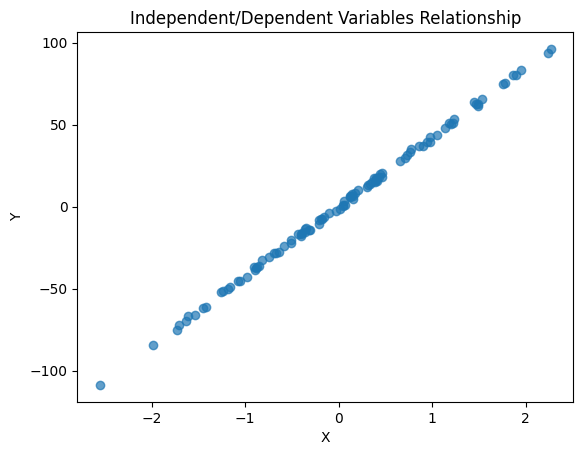

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X.flatten(), y, alpha=0.7)
plt.title("Independent/Dependent Variables Relationship")
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([42.4088974]), -0.081418182703072)

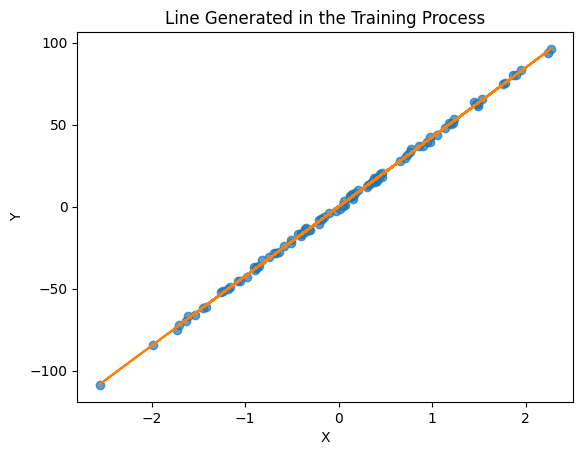

In [ ]:
y_pred = model.predict(X)

plt.scatter(X.flatten(), y, alpha=0.7)
plt.title("Line Generated in the Training Process")
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(X, y_pred, color="tab:orange")

## Part 2 - Data Split Strategies

The data is usually divided into different subsets, each of which has its own particular purpose: training the model, fine-tuning possible hyper-parameters, testing and evaluating the model. There are several strategies to do this: random split, cross validation and leave one out. In this part, the goal is to apply this same division in the different forms for the purposes of illustration.

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

X_train.shape, X_test.shape

((80, 1), (20, 1))

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

for i, (train_indexes, test_indexes) in enumerate(kfold.split(X)):
    print(f"Fold {i}")
    print(f"\t Test: {test_indexes}")


Fold 0
	 Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fold 1
	 Test: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fold 2
	 Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Fold 3
	 Test: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fold 4
	 Test: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train_indexes, test_indexes in loo.split(X):
    print(f"Test: {test_indexes}")

    if test_indexes[0] > 19:
      print("...")
      break


Test: [0]
Test: [1]
Test: [2]
Test: [3]
Test: [4]
Test: [5]
Test: [6]
Test: [7]
Test: [8]
Test: [9]
Test: [10]
Test: [11]
Test: [12]
Test: [13]
Test: [14]
Test: [15]
Test: [16]
Test: [17]
Test: [18]
Test: [19]
Test: [20]
...


## Part 3 - Evaluation Metrics

What is the performance of the model? How good the model can make predictions? These are valid questions that have to be answer before deploying a model, and that are part of the model selection phase. To do so, clear metrics are calculated to evaluate the model to take conclusions about it. Some of the most used regression metrics include: Mean Absolute Error (MAE), Mean Square Error (MSE), Root Mean Square Error (RMSE), and R-Squared Score (R2). In this third part, we apply a cross validation strategy and the listed metrics are calculated.

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

kfold = KFold(n_splits=5)

for i, (train_indexes, test_indexes) in enumerate(kfold.split(X)):
    X_train = X[train_indexes]
    X_test = X[test_indexes]
    y_train = y[train_indexes]
    y_test = y[test_indexes]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse ** 0.5

    print(f"Fold {i}")
    print(f"\t MAE={mae}")
    print(f"\t MSE={mse}")
    print(f"\t R2={r2}")
    print(f"\t RMSE={rmse}")


Fold 0
	 MAE=0.8621552298978855
	 MSE=1.0962047425997308
	 R2=0.9991740317272837
	 RMSE=1.046997966855586
Fold 1
	 MAE=1.1204936504484526
	 MSE=1.7660868415050117
	 R2=0.9987579014443851
	 RMSE=1.3289420008055324
Fold 2
	 MAE=1.0036298987412464
	 MSE=1.5132931891492074
	 R2=0.9993053057530135
	 RMSE=1.2301598226040418
Fold 3
	 MAE=0.8524516012025206
	 MSE=1.0506789465771977
	 R2=0.9996546320170226
	 RMSE=1.0250263150657146
Fold 4
	 MAE=0.703414249405674
	 MSE=0.7691013896506624
	 R2=0.9990726778559803
	 RMSE=0.8769842584965037


In [ ]:
from sklearn.model_selection import cross_val_predict

model = LinearRegression()
y_pred = cross_val_predict(model, X, y, cv=5)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = mse ** 0.5

print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"R2={r2}")
print(f"RMSE={rmse}")

MAE=0.9084289259391557
MSE=1.2390730218963621
R2=0.9993222148719967
RMSE=1.1131365692925383


## Part 4 - Useful Plots

Visualization can be useful and complementary to understand the results. In addition to calculated metrics, it can also be beneficial to observe the following plots: predicted vs actuals, residuals histogram, and actuals vs residuals.

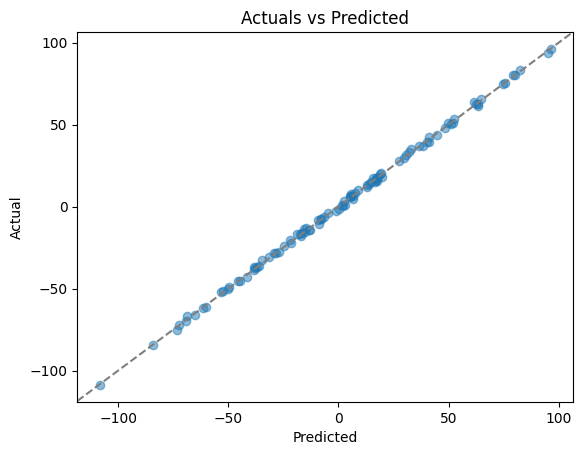

In [ ]:
plt.scatter(y_pred, y, alpha=0.5)
plt.title("Actuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.gca().axline((0, 0), slope=1, color="tab:gray", linestyle="--")

Text(0, 0.5, 'Count')

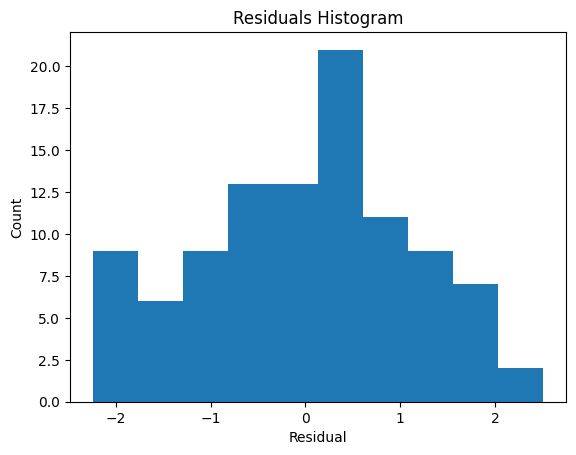

In [ ]:
residuals = y - y_pred

plt.hist(residuals)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Count")

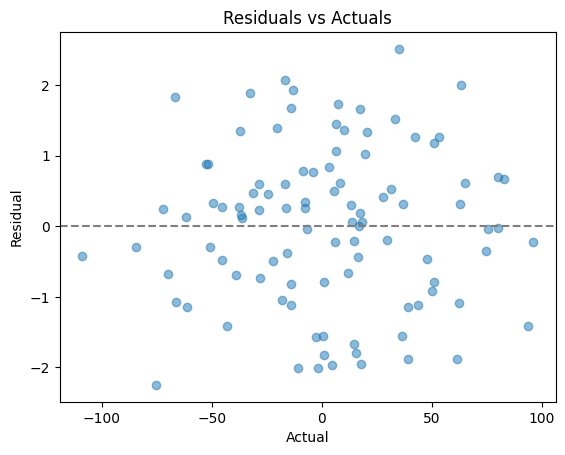

In [ ]:
plt.scatter(y, residuals, alpha=0.5)
plt.title("Residuals vs Actuals")
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.gca().axline((0, 0), slope=0, color="tab:gray", linestyle="--")

## Part 5 - Polynomial Regression

The relationship between the independent variables and the dependent variable is not always linear. In these cases, including polynomial terms may improve the performance. In this part, we will apply a polynomial regression and compare the results with was obtained in the previous sections.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
y_squared = y ** 2

X[:5], X_poly[:5]

(array([[-0.35955316],
        [ 0.97663904],
        [ 0.40234164],
        [-0.81314628],
        [-0.88778575]]),
 array([[-0.35955316,  0.12927848],
        [ 0.97663904,  0.95382381],
        [ 0.40234164,  0.1618788 ],
        [-0.81314628,  0.66120688],
        [-0.88778575,  0.78816353]]))

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X, y_squared)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_squared)

LinearRegression()

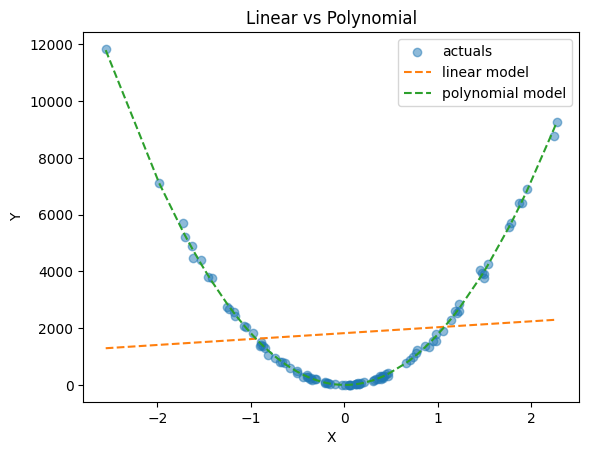

In [ ]:
import numpy as np

y_pred_linear = linear_model.predict(X)
y_pred_poly = poly_model.predict(X_poly)

sorted_indexes = np.argsort(X.flatten())
X_sorted = X.flatten()[sorted_indexes]

plt.scatter(X_sorted, y_squared[sorted_indexes], alpha=0.5, label="actuals")
plt.title("Linear vs Polynomial")
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(
    X_sorted, 
    y_pred_linear[sorted_indexes], 
    "--", 
    color="tab:orange", 
    label="linear model",
)
plt.plot(
    X_sorted, 
    y_pred_poly[sorted_indexes], 
    "--", 
    color="tab:green", 
    label="polynomial model",
)
plt.legend()

In [ ]:
y_pred = cross_val_predict(linear_model, X, y_squared, cv=5)

mae = mean_absolute_error(y_squared, y_pred)
mse = mean_squared_error(y_squared, y_pred)
r2 = r2_score(y_squared, y_pred)
rmse = mse ** 0.5

print("Linear Model Evaluation:")
print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"R2={r2}")
print(f"RMSE={rmse}")

Linear Model Evaluation:
MAE=1812.4334097918857
MSE=5966835.355196196
R2=-0.0863241551310745
RMSE=2442.7106572814137


In [ ]:
y_pred = cross_val_predict(model, X_poly, y_squared, cv=5)

mae = mean_absolute_error(y_squared, y_pred)
mse = mean_squared_error(y_squared, y_pred)
r2 = r2_score(y_squared, y_pred)
rmse = mse ** 0.5

print("Polynomial Model Evaluation:")
print(f"MAE={mae}")
print(f"MSE={mse}")
print(f"R2={r2}")
print(f"RMSE={rmse}")

Polynomial Model Evaluation:
MAE=58.4698071861382
MSE=7429.651964598892
R2=0.9986473549355888
RMSE=86.19542890779587
